# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Traffic Data.csv')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [3]:
df.sample(3)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
15515,3630.0,256.86,0.0,0.0,5,Clear,sky is clear,2018-02-04 16:00:00
11480,5710.0,267.61,0.0,0.0,1,Clear,sky is clear,2017-02-10 08:00:00
14297,962.0,256.16,0.0,0.0,1,Mist,mist,2017-01-15 01:00:00


In [4]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
16389,6510.0,288.37,0.25,0.0,90,Mist,mist,2018-09-19 07:00:00
16390,416.0,291.48,0.00,0.0,40,Mist,mist,2018-08-21 01:00:00
16391,5304.0,295.69,0.00,0.0,90,Clouds,overcast clouds,2017-08-16 14:00:00
16392,4362.0,271.15,0.00,0.0,90,Snow,light snow,2016-12-30 18:00:00
16393,1919.0,283.75,0.00,0.0,90,Clouds,overcast cl,NaN


In [5]:
df.sample(6)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
8091,5689.0,291.65,0.00,0.0,1,Clear,sky is clear,2017-09-08 14:00:00
2811,6558.0,268.97,0.00,0.0,90,Clouds,overcast clouds,2016-12-06 07:00:00
9860,5038.0,299.61,0.00,0.0,20,Clouds,few clouds,2017-08-30 13:00:00
14251,882.0,292.18,0.28,0.0,90,Drizzle,drizzle,2018-09-05 04:00:00
1956,5803.0,275.84,0.00,0.0,90,Mist,mist,2017-03-24 08:00:00
12961,4429.0,282.69,0.00,0.0,75,Clouds,broken clouds,2018-09-30 12:00:00


In [6]:
df['weather_main'].value_counts()

,count
weather_main,
Clear,4651
Clouds,4268
Mist,2231
Rain,1849
Snow,1204
Drizzle,808
Haze,546
Thunderstorm,446
Fog,388


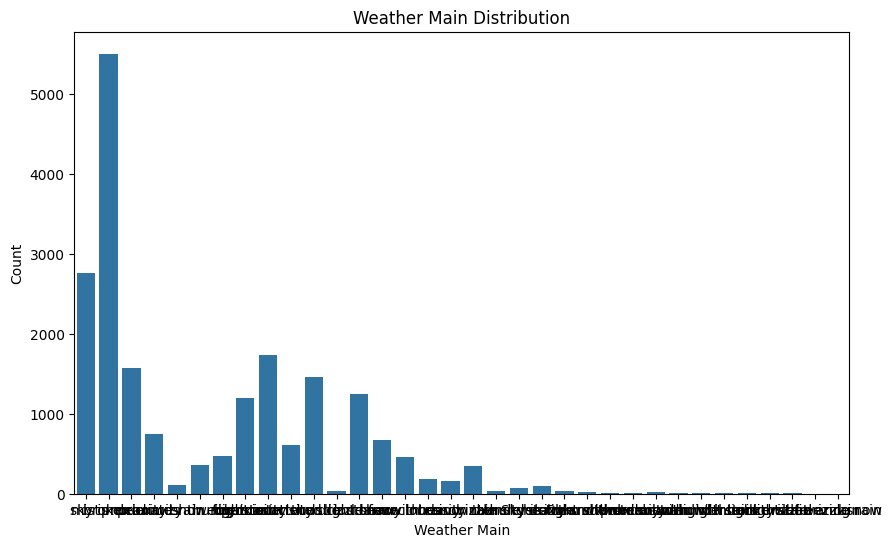

In [24]:
# plt.figure(figsize=(10, 6))
# sns.countplot(data=df, x='weather_description')
# plt.title('Weather Main Distribution')
# plt.xlabel('Weather Main')
# plt.ylabel('Count')
# plt.show()

In [7]:
df.shape

(16394, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16394 entries, 0 to 16393
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       16375 non-null  float64
 1   temp                 16394 non-null  float64
 2   rain_1h              16394 non-null  float64
 3   snow_1h              16394 non-null  float64
 4   clouds_all           16394 non-null  int64  
 5   weather_main         16394 non-null  object 
 6   weather_description  16394 non-null  object 
 7   date_time            16393 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.0+ MB


In [9]:
df.dtypes

,0
traffic_volume,float64
temp,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64
weather_main,object
weather_description,object
date_time,object


In [10]:
df['weather_description'].value_counts()

,count
weather_description,
sky is clear,4565
mist,2231
overcast clouds,1440
broken clouds,1291
scattered clouds,1160
light snow,1035
light rain,992
moderate rain,617
haze,546


In [11]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# df.set_index('date_time', inplace=True)

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [12]:
features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']

target = ['traffic_volume']

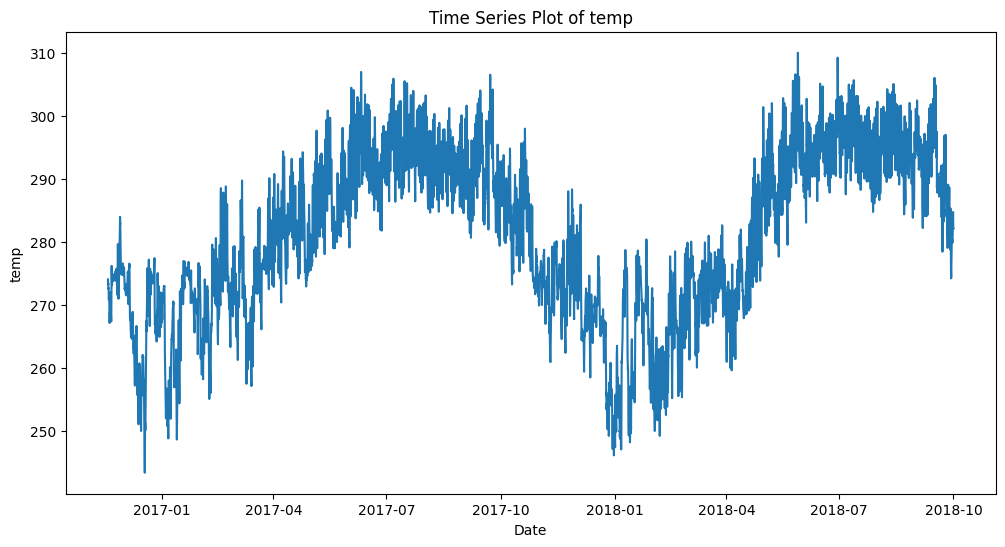

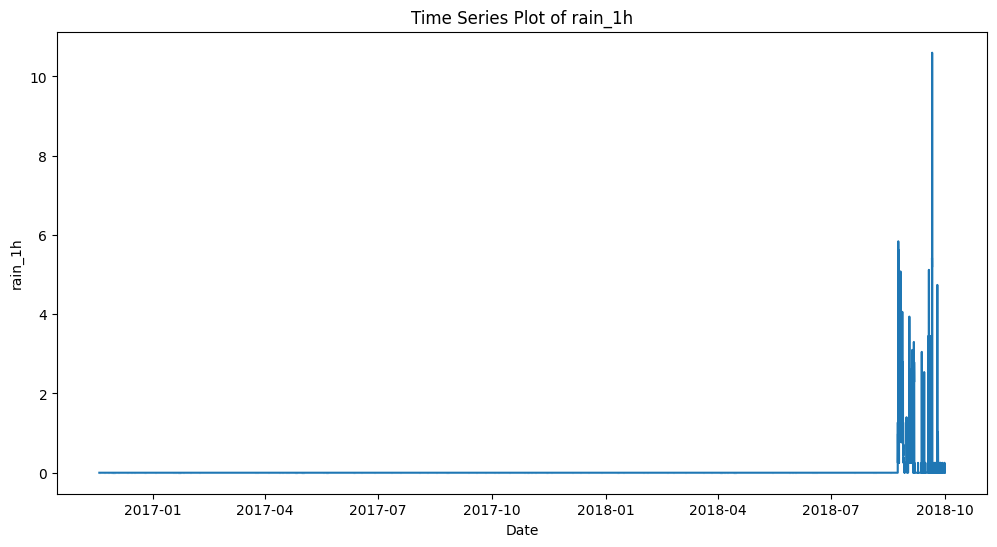

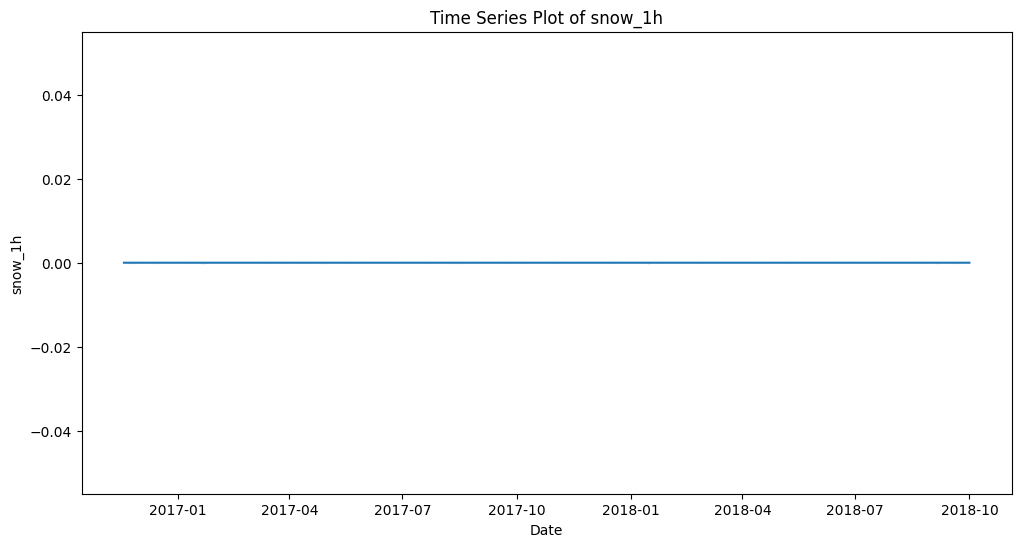

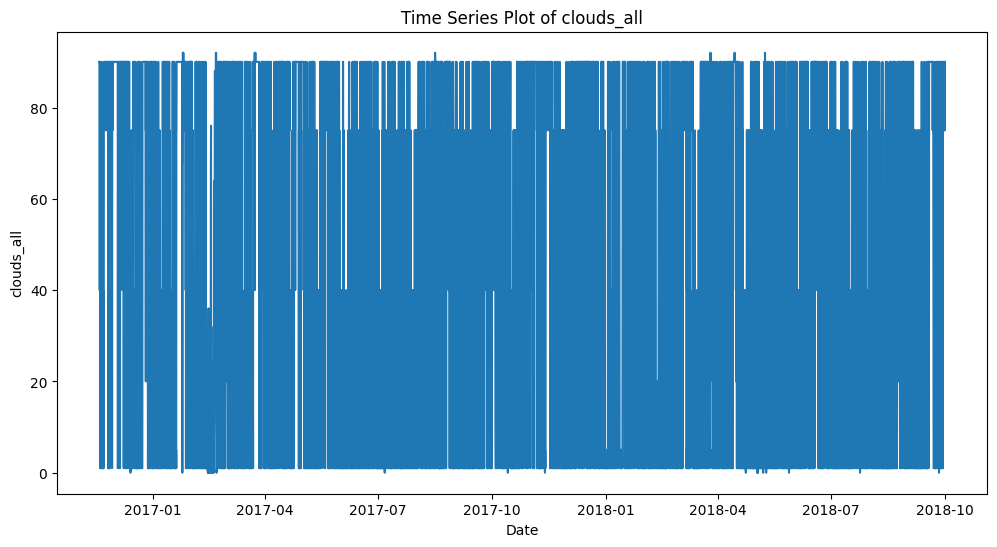

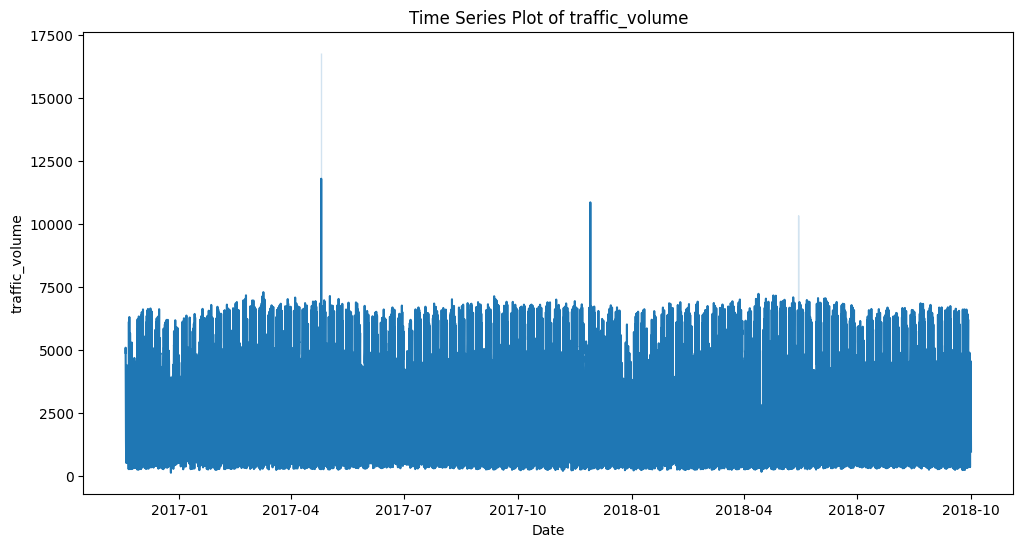

In [26]:
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='date_time', y=feature, color = 'red')
    plt.title(f'Time Series Plot of {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.show()

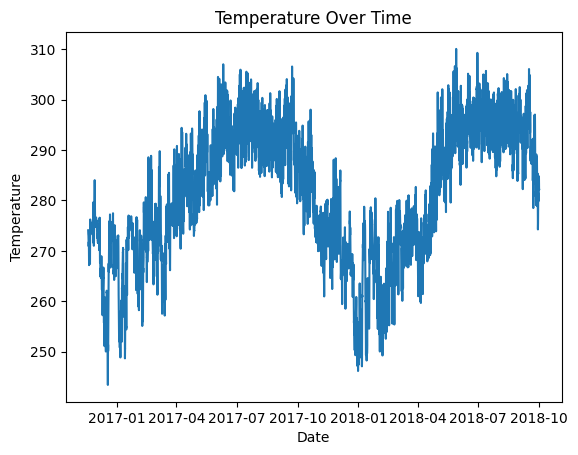

In [20]:
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='date_time', y='temp')
# plt.title('Temperature Over Time')
# plt.xlabel('Date')
# plt.ylabel('Temperature')
# plt.show()

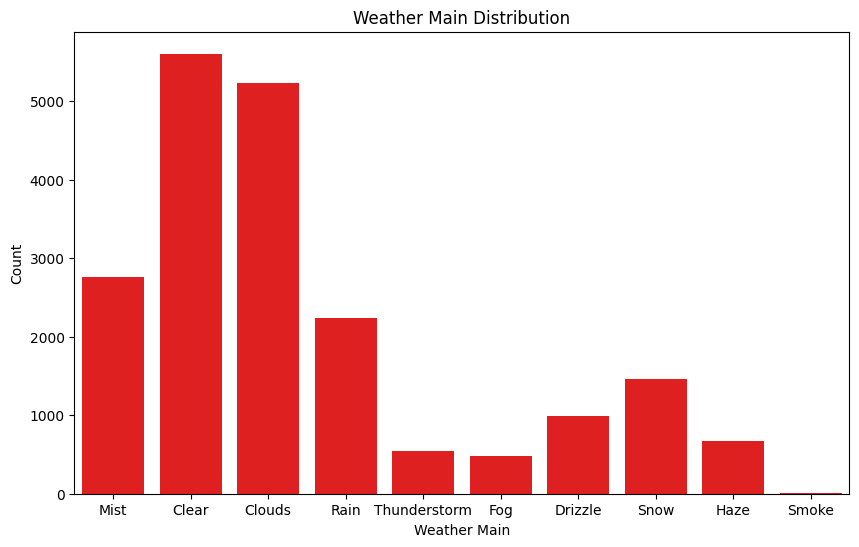

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather_main', color = 'red')
plt.title('Weather Main Distribution')
plt.xlabel('Weather Main')
plt.ylabel('Count')
plt.show()

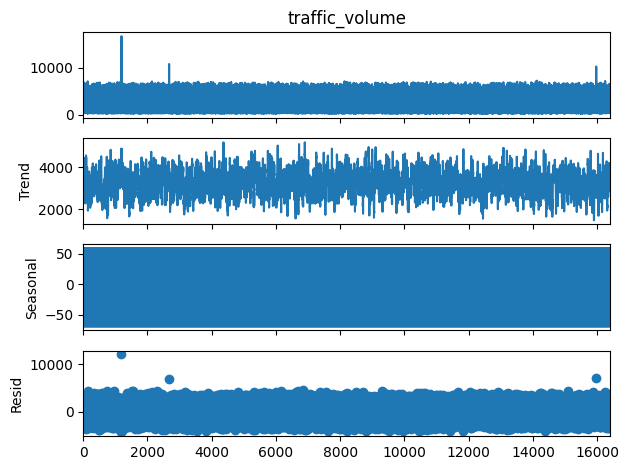

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df["traffic_volume"], model='additive', period=12)

decomposition.plot()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [14]:
df.isnull().sum()

,0
traffic_volume,19
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,1


In [15]:
# I will drop the 20 rows becauce compare to the size of the dataset is nothing
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [18]:
df.sort_values(by='date_time', inplace=True)

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [19]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

In [20]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00,NaN
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,4872.0
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00,4872.0
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00,4872.0
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,5074.0


In [21]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()

In [22]:
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['day_of_year'] = df['date_time'].dt.dayofyear

In [23]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00,NaN,NaN,4,11,323
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,4872.0,0.0,4,11,323
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00,4872.0,0.0,4,11,323
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00,4872.0,202.0,4,11,323
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,5074.0,0.0,4,11,323


In [89]:
# df.set_index('date_time', inplace=True)

In [24]:
df.dropna(inplace=True)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [25]:
# before splliting the data i will encoding cataogrcal columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])

df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,traffic_volume_diff,day_of_week,month,day_of_year
7745,4872.0,274.08,0.0,0.0,90,8,8,2016-11-18 15:00:00,4872.0,0.0,4,11,323
4628,4872.0,274.08,0.0,0.0,90,3,4,2016-11-18 15:00:00,4872.0,0.0,4,11,323
3867,5074.0,273.84,0.0,0.0,90,5,15,2016-11-18 16:00:00,4872.0,202.0,4,11,323
8867,5074.0,273.84,0.0,0.0,90,3,4,2016-11-18 16:00:00,5074.0,0.0,4,11,323
8329,4328.0,273.62,0.0,0.0,90,3,4,2016-11-18 17:00:00,5074.0,-746.0,4,11,323


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

columns_to_scale = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [27]:
cutoff_date = df['date_time'].quantile(0.8)

# Split the data
train_data = df[df['date_time'] < cutoff_date]
test_data = df[df['date_time'] >= cutoff_date]

features = [col for col in train_data.columns if col not in ['date_time', 'traffic_volume']]
X_train = train_data[features].values

y_train = train_data['traffic_volume'].values

In [134]:
# df.set_index('date_time', inplace=True)

In [28]:
# using timeseriesgenerator gor splilitng the data
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split

train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

sequence_length = 10

train_generator = TimeseriesGenerator(
    train_data[features].values,
    train_data[target].values,
    length=sequence_length,
    batch_size=1
)

test_generator = TimeseriesGenerator(
    test_data[features].values,
    test_data[target].values,
    length=sequence_length,
    batch_size=1
)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

I already Scaled the data

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [29]:
# LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, len(features))))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 50)              │          12,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,401 (216.41 KB)

 Trainable params: 55,401 (216.41 KB)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [35]:
his = model.fit(train_generator, epochs=3 , validation_data=test_generator)

Epoch 1/3
13088/13088 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - loss: 0.5610 - val_loss: 0.0139
Epoch 2/3
13088/13088 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - loss: 0.0294 - val_loss: 0.0138
Epoch 3/3
13088/13088 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 0.0145 - val_loss: 0.0139


### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [36]:
predictions = model.predict(test_generator)

predictions = predictions.ravel()
predictions_df = pd.DataFrame({
    'Predicted': predictions
})

predictions_df.to_csv('predictions.csv', index=False)
print(predictions)


# predictions_df = pd.DataFrame({
#     'Date': df.iloc[len(df) - len(predictions):]['date_time'].values,
#     'Actual': test_data[target].values[sequence_length:],
#     'Predicted': predictions
# })

# predictions_df.to_csv('predictions.csv', index=False)

3265/3265 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
[0.18365403 0.18365403 0.18365403 ... 0.18365403 0.18365403 0.18365403]


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = model.predict(test_generator)

# predictions = np.flatten(predictions)
predictions = predictions.ravel()

actual_values = test_data[target].values[sequence_length:]

mae = mean_absolute_error(actual_values, predictions)
mse = mean_squared_error(actual_values, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

3265/3265 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Mean Absolute Error (MAE): 0.10313606846590484
Mean Squared Error (MSE): 0.013873775539312074
Root Mean Squared Error (RMSE): 0.11778699223306482
Mean Absolute Percentage Error (MAPE): 212.72079073735588%


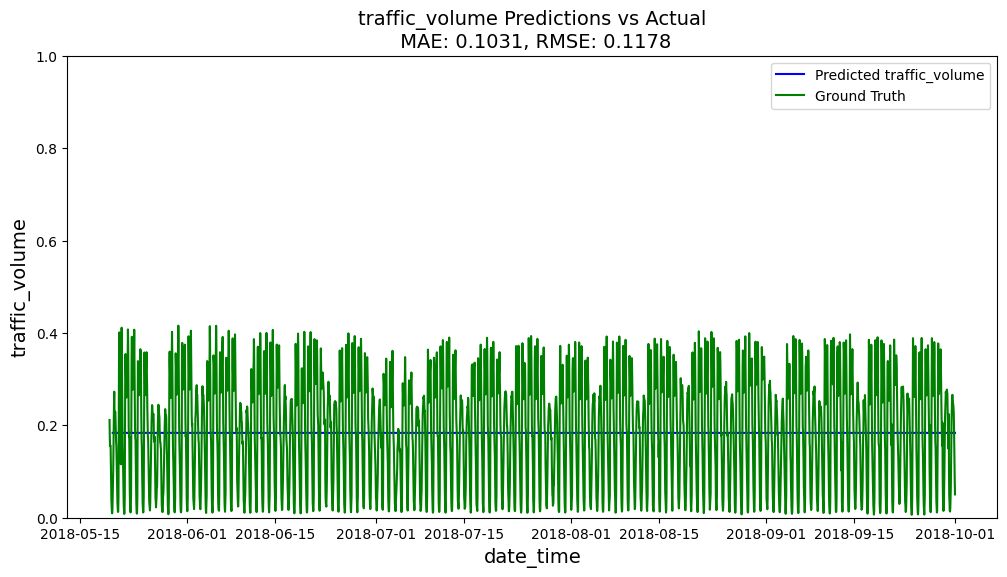

In [38]:
score_mae = mean_absolute_error(test_data['traffic_volume'].values[-len(predictions):], predictions)
score_rmse = np.sqrt(mean_squared_error(test_data['traffic_volume'].values[-len(predictions):], predictions))
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(12)

predictions_dates = test_data['date_time'].values[-len(predictions):]
ax.plot(predictions_dates, predictions, color='blue', label='Predicted traffic_volume')
sns.lineplot(x=test_data['date_time'], y=test_data['traffic_volume'], ax=ax, color='green', label='Ground Truth')

ax.set_title(f'traffic_volume Predictions vs Actual\n MAE: {score_mae:.4f}, RMSE: {score_rmse:.4f}', fontsize=14)
ax.set_xlabel('date_time', fontsize=14)
ax.set_ylabel('traffic_volume', fontsize=14)
ax.set_ylim(0, 1)

ax.legend()

plt.show()

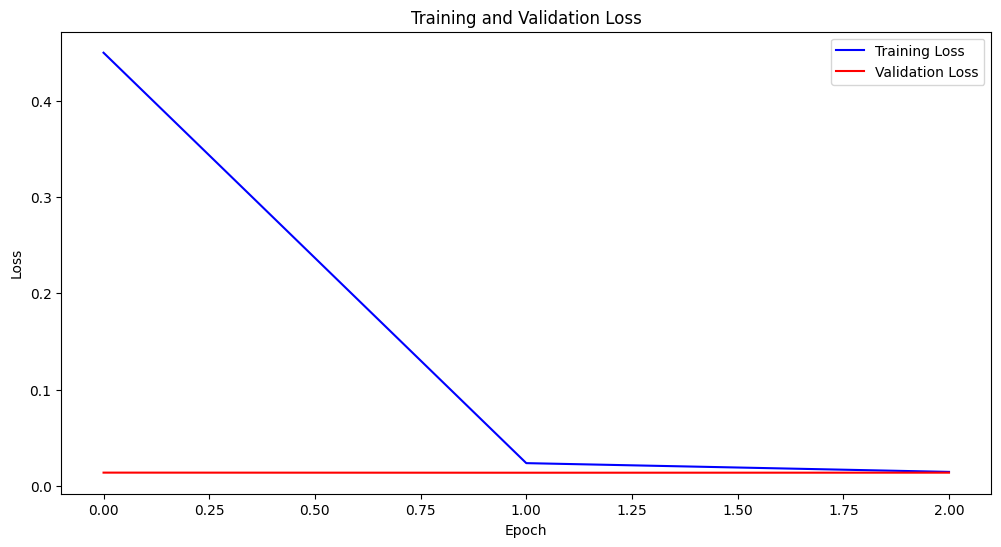

In [39]:
history = his.history

plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Training Loss', color='blue')
plt.plot(history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

model = Sequential()
model.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(sequence_length, len(features))))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10, 50)              │           3,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 10, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,801 (61.72 KB)

 Trainable params: 15,801 (61.72 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
his = model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5
13088/13088 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - loss: 0.1168 - val_loss: 0.0141
Epoch 2/5
13088/13088 ━━━━━━━━━━━━━━━━━━━━ 58s 4ms/step - loss: 0.0288 - val_loss: 0.0138
Epoch 3/5
13088/13088 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - loss: 0.0143 - val_loss: 0.0139
Epoch 4/5
13088/13088 ━━━━━━━━━━━━━━━━━━━━ 86s 4ms/step - loss: 0.0144 - val_loss: 0.0140
Epoch 5/5
13088/13088 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - loss: 0.0144 - val_loss: 0.0140


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [47]:
predictions = model.predict(test_generator)

predictions = predictions.ravel()
predictions_df = pd.DataFrame({
    'Predicted': predictions
})

predictions_df.to_csv('predictions.csv', index=False)
print(predictions)


# ----------
# predictions_df = pd.DataFrame({
#     'Date': df.iloc[len(df) - len(predictions):]['date_time'].values,
#     'Actual': test_data[target].values[sequence_length:],
#     'Predicted': predictions
# })

# predictions_df.to_csv('predictions.csv', index=False)

# print(predictions)

3265/3265 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
[0.17929564 0.17929564 0.17929564 ... 0.17929564 0.17929564 0.17929564]


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predictions = model.predict(test_generator)

# predictions = np.flatten(predictions)
predictions = predictions.ravel()

actual_values = test_data[target].values[sequence_length:]

mae = mean_absolute_error(actual_values, predictions)
mse = mean_squared_error(actual_values, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

3265/3265 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Mean Absolute Error (MAE): 0.10356113452686777
Mean Squared Error (MSE): 0.01396708661493982
Root Mean Squared Error (RMSE): 0.11818242938330477
Mean Absolute Percentage Error (MAPE): 207.9043311923284%


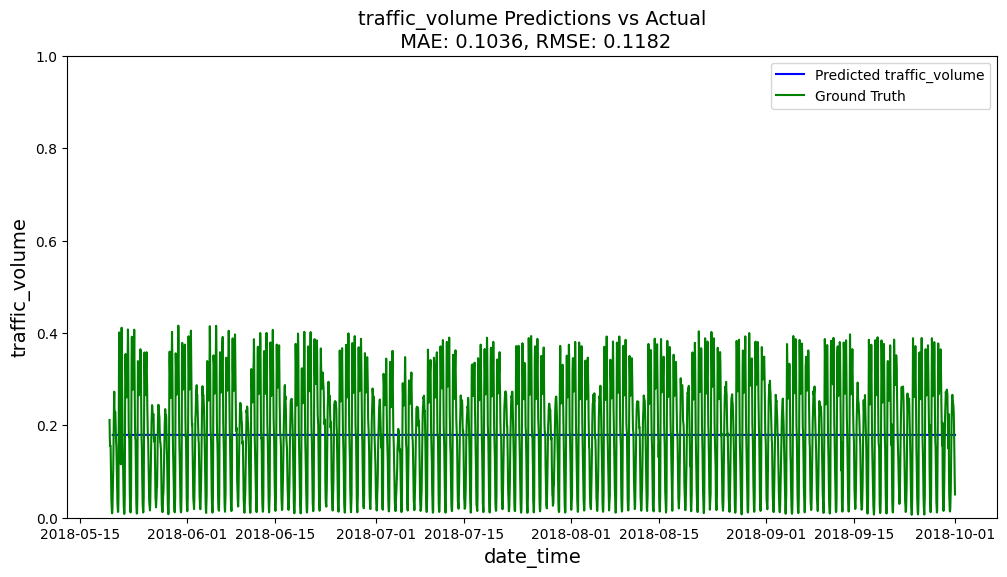

In [49]:
score_mae = mean_absolute_error(test_data['traffic_volume'].values[-len(predictions):], predictions)
score_rmse = np.sqrt(mean_squared_error(test_data['traffic_volume'].values[-len(predictions):], predictions))
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(12)

predictions_dates = test_data['date_time'].values[-len(predictions):]
ax.plot(predictions_dates, predictions, color='blue', label='Predicted traffic_volume')
sns.lineplot(x=test_data['date_time'], y=test_data['traffic_volume'], ax=ax, color='green', label='Ground Truth')

ax.set_title(f'traffic_volume Predictions vs Actual\n MAE: {score_mae:.4f}, RMSE: {score_rmse:.4f}', fontsize=14)
ax.set_xlabel('date_time', fontsize=14)
ax.set_ylabel('traffic_volume', fontsize=14)
ax.set_ylim(0, 1)

ax.legend()

plt.show()

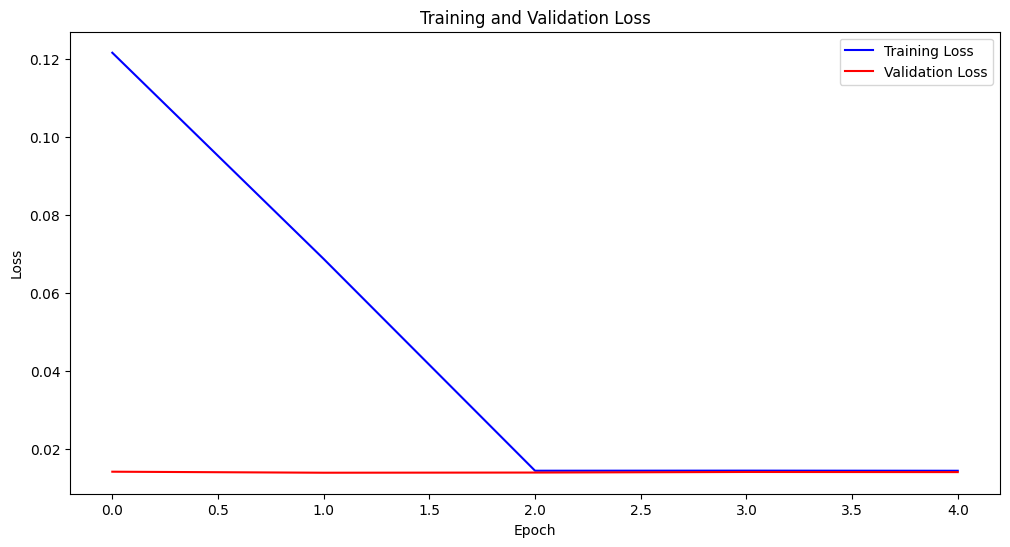

In [50]:
history = his.history

plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Training Loss', color='blue')
plt.plot(history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain How you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

- Data Preprocessing:

The dataset has missing values so I need to drop it or fill it before build the model , in my case I droped the rows that contains nulls values because it is just 20 rows compaied to the full dataset.

- Feature Engineering:

I extracted year , day .. from the data_time column to increces and enhancment the learning process of the model.

- Model Architecture:

I bulid two models : LSTM and SimpleRNN all of them contains a numbers of lyaers and dropout layers to prevent overfiting during the learning.

- Training Process:

I choses the number of epochs based on my expermients.

